<a href="https://colab.research.google.com/github/AndyAlyf/Klasifikasi-Text/blob/master/FinalBCCFarrel_DiabetesSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset

#### Menyiapkan Library yang akan digunakan.

In [0]:
from random import randrange
from math import *
import pandas as pd
import numpy as numpy
import seaborn as s
import matplotlib as plt
from matplotlib import pyplot as pyt
import time  
from scipy import stats
from math import sqrt
from collections import Counter

# Persiapan Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None 

Counter({0: 500, 1: 268}) 



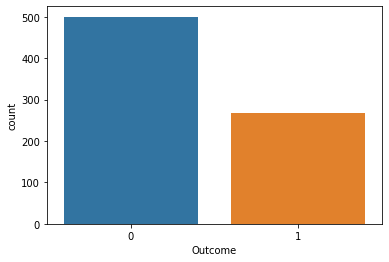

In [0]:
dataset = pd.read_csv('Diabetes.csv')
print(dataset.info(),"\n")
print(Counter(dataset.Outcome),"\n")
s.countplot(x='Outcome',data=dataset)


In [0]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [0]:
dataset = pd.read_csv('Diabetes.csv')
#Train 576 0-575, Test 192 576-767
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:].values
X_train1 = dataset.iloc[0:end,:-1].values
y_train = dataset.iloc[0:end,-1:].values
X_test = dataset.iloc[end:,:-1].values
y_test = dataset.iloc[end:,-1:].values

# Visualisasi Data

C:\Users\Alfarrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alfarrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


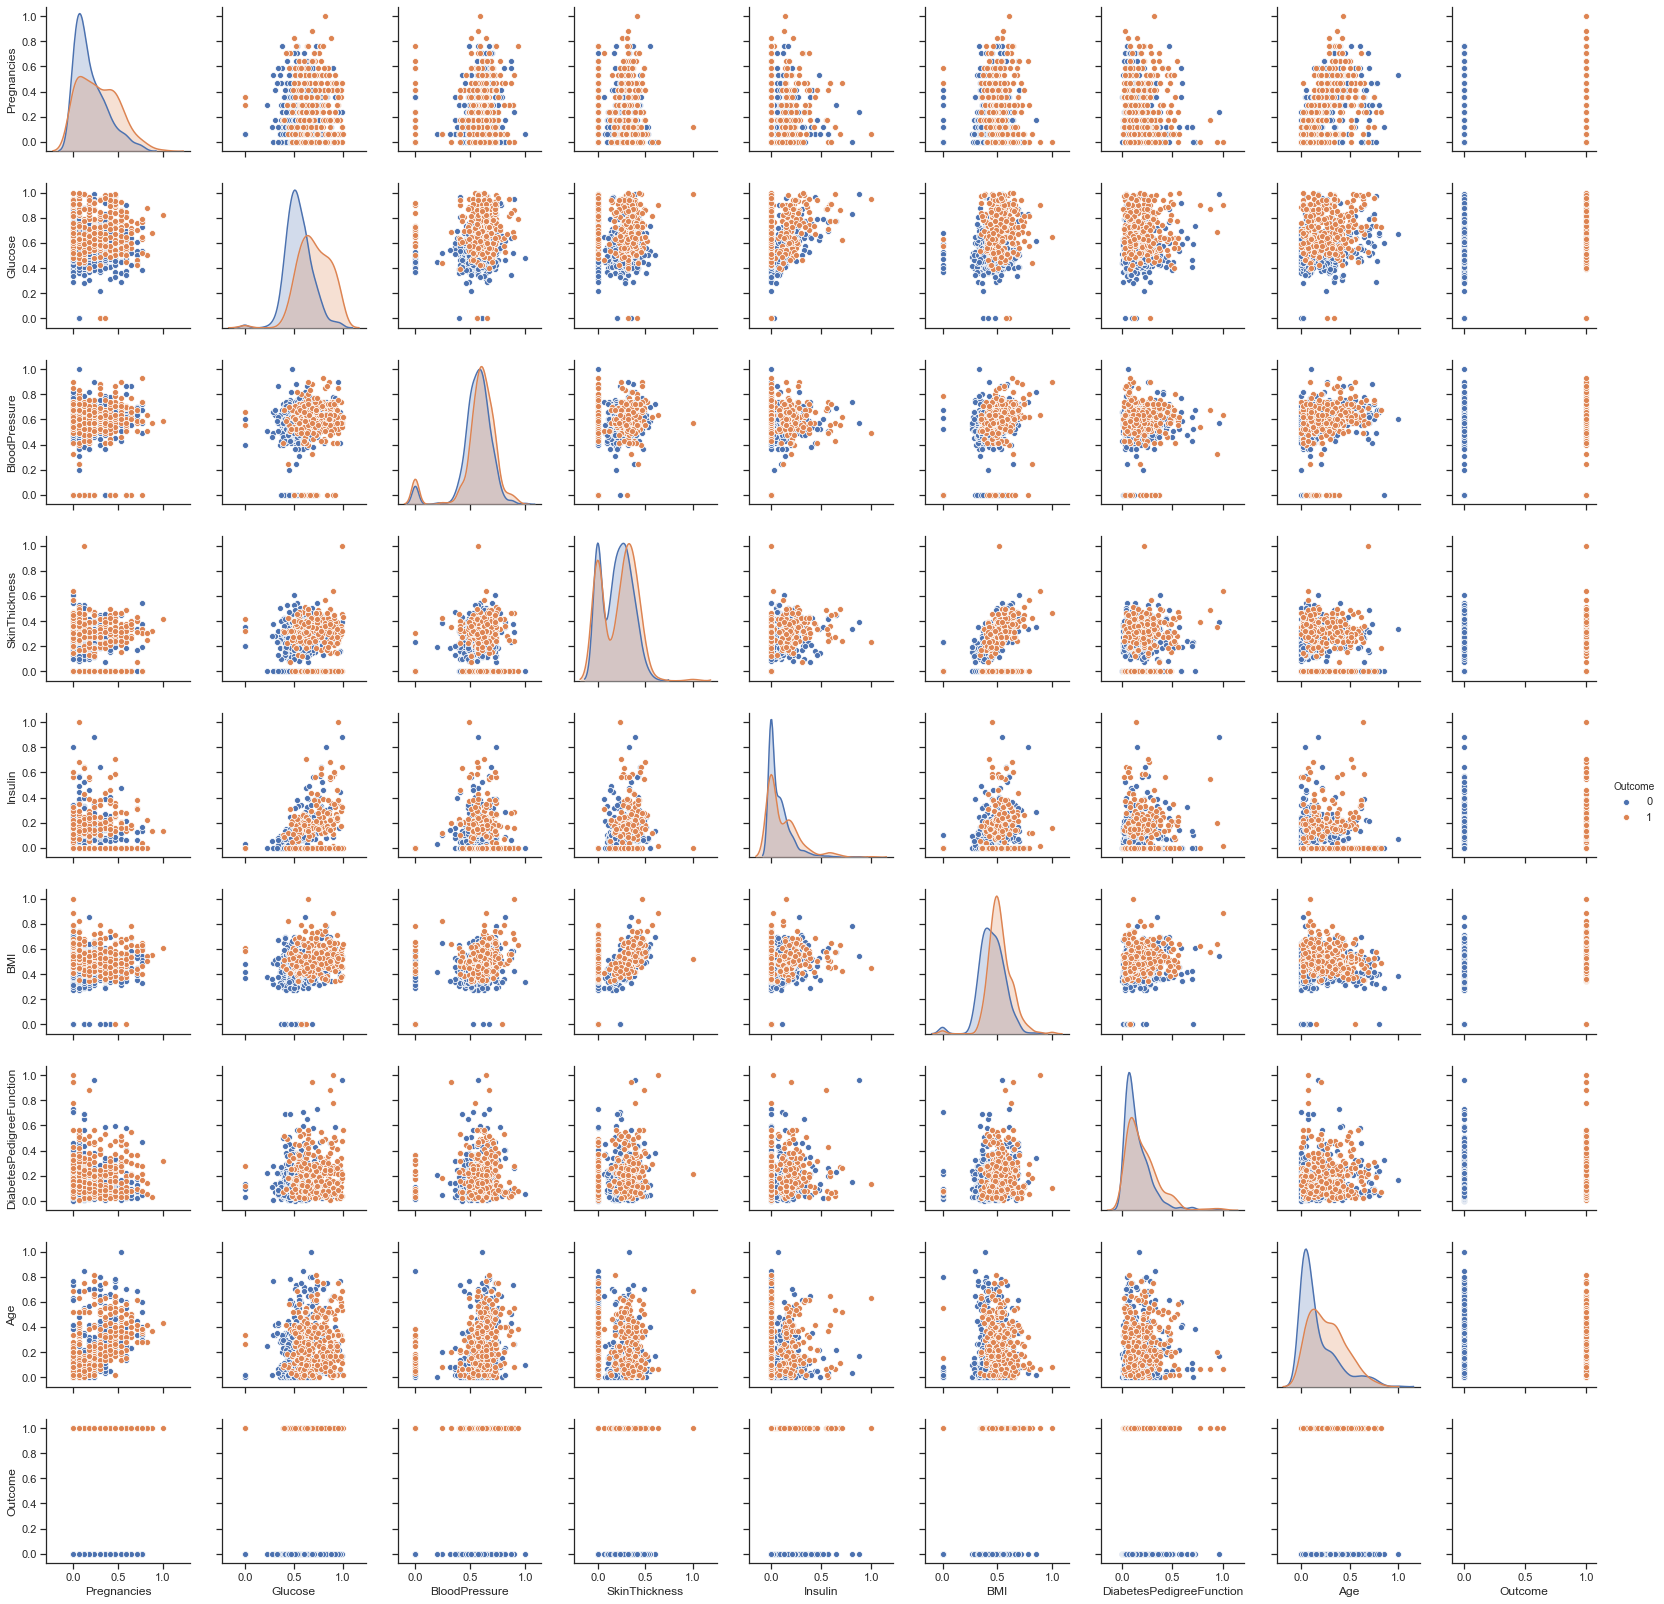

In [0]:
s.set(style="ticks")

s.pairplot(dataset, hue="Outcome")

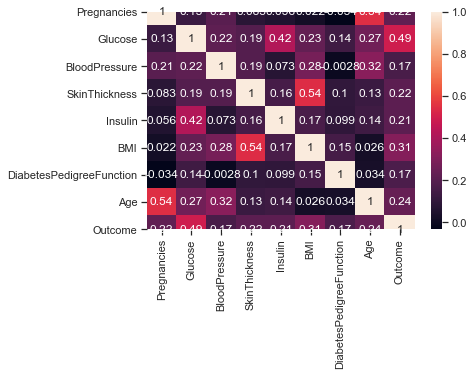

In [0]:
corr= dataset.corr()
s.heatmap(corr,annot=True)


![heatmap.JPG](attachment:heatmap.JPG)

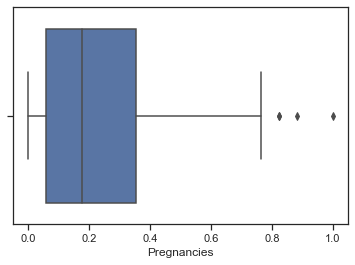

In [0]:
s.boxplot(x=dataset['Pregnancies'])

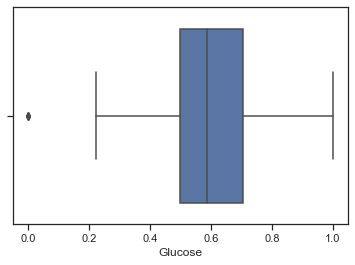

In [0]:
s.boxplot(x=dataset['Glucose'])


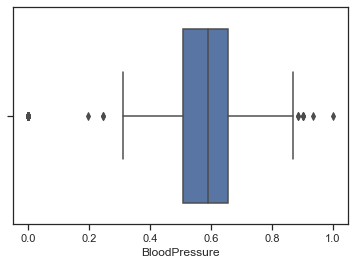

In [0]:
s.boxplot(x=dataset['BloodPressure'])


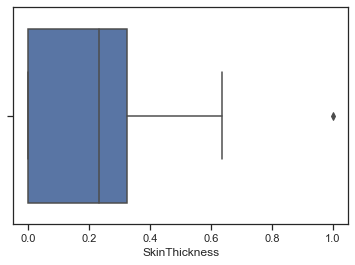

In [0]:
s.boxplot(x=dataset['SkinThickness'])


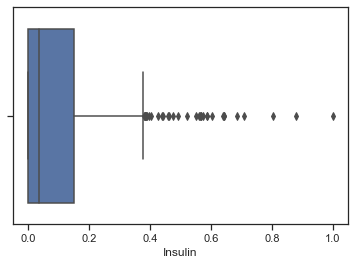

In [0]:

s.boxplot(x=dataset['Insulin'])


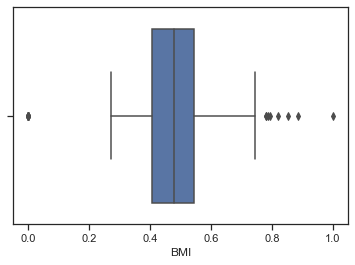

In [0]:
s.boxplot(x=dataset['BMI'])


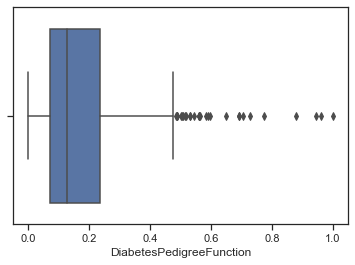

In [0]:
s.boxplot(x=dataset['DiabetesPedigreeFunction'])


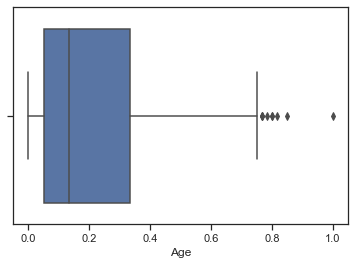

In [0]:
s.boxplot(x=dataset['Age'])

# NAIVE BAYES
merupakan sebuah metoda klasifikasi menggunakan metode probabilitas dan statistik yg dikemukakan oleh ilmuwan Inggris Thomas Bayes. Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naïve Bayes Classifier ini adalah asumsi yg sangat kuat (naïf) akan independensi dari masing-masing kondisi / kejadian.

## Metode Naive Bayes

###### 1. Memisahkan data berdasarkan class yaitu 0 dan 1

In [0]:
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated


###### 2. Function mencari Rata - rata perFeature
![mean-formula.jpg](attachment:mean-formula.jpg)

In [0]:
def mean(numbers):
     return sum(numbers)/float(len(numbers))

###### 3. Function mencari standard Deviasi perFeature
![standart-deviasi-formula.jpg](attachment:standart-deviasi-formula.jpg)

In [0]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

###### 4. Menghitung rata-rata. standart deviasi dan banyak data per Feature (kolom) dijadikan satu iterator kumpulan item

In [0]:
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

summaries = pd.DataFrame(summarize_dataset(X_train.tolist()))
print(summaries)

          0         1    2
0  0.223958  0.196825  576
1  0.603242  0.163831  576
2  0.563994  0.158098  576
3  0.207912  0.158026  576
4  0.094431  0.136883  576
5  0.475291  0.119719  576
6  0.171621  0.143418  576
7  0.203096  0.196271  576


###### 5. Memisahkan data perkelas 0 dan 1, kemudian mencari mean, standart deviasi dan banyak data per Feature dalam masing-masing kelas

In [0]:
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

summaries = pd.DataFrame(summarize_by_class(X_train.tolist()))
print(summaries)

                                              1.0  \
0  (0.28401663691919204, 0.2209005102032544, 198)   
1  (0.7021724785404042, 0.16523513600360257, 198)   
2     (0.573149528070707, 0.181218216671048, 198)   
3  (0.22303846547979805, 0.1723399390123218, 198)   
4  (0.12198223370707069, 0.1625702610933383, 198)   
5   (0.5263966038737377, 0.1083966751259389, 198)   
6  (0.20788586115656557, 0.1647538110238065, 198)   
7          (0.259006734, 0.1787150064570491, 198)   

                                               0.0  
0  (0.19249922182804238, 0.17521616523022857, 378)  
1    (0.5514211268148145, 0.1372502863111289, 378)  
2   (0.5591985427989413, 0.14455096029830974, 378)  
3   (0.1999893111031746, 0.14961315419990173, 378)  
4  (0.07999987490740743, 0.11899438474132136, 378)  
5   (0.4485211206375661, 0.11674727411501624, 378)  
6  (0.15262584774338614, 0.12702448303421507, 378)  
7  (0.17380952385714285, 0.19890388444573467, 378)  


###### 6. Function untuk menghitung Probability untuk diabetes menggunakan mean dan standart deviasi (Densitas Gaussan) karena datanya kontinyu
![distribusi-normal-gauss.jpg](attachment:distribusi-normal-gauss.jpg)

In [0]:
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 

###### 7. Function untuk menghitung probability dari kasus per Kelas 0 dan 1

In [0]:
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

###### 8. Function untuk menentukan prediksi yang ditentukan dari probability kasus per Kelas 0 dan 1 dipilih yang mendekati 0 jika ada di class 0 dan mendekati 1 jika ada di class 1, mengembalikan label terbaik

In [0]:
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label
 

###### 9. Algoritma naive bayes yang menghasilkan hasil prediksi data yang diproses dengan menggabungkan function diatas yaitu mencari rata-rata, standart deviasi dan banyak data dari setiap kelas 0 dan 1 , melakukan prediksi dengan menghitung probabilitasnya kasus terhadap setiap kelas , dipilih label terbaik yaitu probabilitas yang mendekati 0 atau 1 dari setiap kelasnya.

In [0]:
# Naive Bayes Algorithm
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

###### 10. Function untuk menghitung akurasi dengan membandingan hasil prediksi dengan label data test, benar dibagi banyak data dikali 100

In [0]:
def akurasi(label_test, prediksi):
    correct = 0
    for i in range(len(label_test)):
        if label_test[i] == prediksi[i]:
            correct += 1
    return correct / float(len(label_test)) * 100.0

###### 11. Function Presisi

In [0]:
def presisi(label_test, prediksi):
    correct = 0
    false = 0
    correct1 = 0
    false1 = 0
    hasil= []
    for i in range(len(label_test)):
        if(label_test[i] ==1):
            if (label_test[i] == prediksi[i]): 
                correct += 1
            if (label_test[i] != prediksi[i]):
                false += 1
        else:
            if (label_test[i] == prediksi[i]):
                correct1 += 1
            if (label_test[i] != prediksi[i]):
                false1 += 1
    hasil.append(correct1 / (correct1+false))
    hasil.append(correct / (correct+false1))
    return hasil


In [0]:
def recall(label_test, prediksi):
    correct = 0
    false = 0
    correct1 = 0
    false1 = 0
    hasil= []
    for i in range(len(label_test)):
        if(label_test[i] ==1):
            if (label_test[i] == prediksi[i]): 
                correct += 1
            if (label_test[i] != prediksi[i]):
                false += 1
        else:
            if (label_test[i] == prediksi[i]):
                correct1 += 1
            if (label_test[i] != prediksi[i]):
                false1 += 1
    hasil.append(correct1 / (correct1+false1))
    hasil.append(correct / (correct+false))
    return hasil

# Klasifikasi Dengan Naive Bayes

In [0]:
awal = time.time()
y_pred = naive_bayes(X_train, X_test)
print("Tingkat Akurasi : ", akurasi(y_test,y_pred))
print("Presisi : ",presisi(y_test,y_pred))
print("Recall  : ",recall(y_test,y_pred),"\n")
print("Hasil Prediksi : ")
print(y_pred, "\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(pd.DataFrame(list(zip(y_test,y_pred)), columns=["Actual","Prediction"]))
akhir = time.time()  
print("Total Waktu Proses ", akhir- awal, " Detik." )

Tingkat Akurasi :  76.04166666666666
Presisi :  [0.7923076923076923, 0.6935483870967742]
Recall  :  [0.8442622950819673, 0.6142857142857143] 

Hasil Prediksi : 
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0

# Klasifikasi Dengan Naive Bayes Menggunakan Sklearn

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train1, y_train)
print("Hasil klasifikasi naive bayes split manual: "+str(classifier.score(X_test,y_test)))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

X = dataset.drop(["Outcome"], axis = 1) #variabel dependen
y = dataset["Outcome"] #variabel independen

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
print("Hasil klasifikasi naive bayes split sklearn: "+str(classifier.score(X_test,y_test)))

Hasil klasifikasi naive bayes split manual: 0.7604166666666666
[[103  19]
 [ 27  43]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       122
           1       0.69      0.61      0.65        70

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192

Hasil klasifikasi naive bayes split sklearn: 0.765625


C:\Users\Alfarrel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K-Nearest Neighbor

Algoritme k-nearest neighbor (k-NN atau KNN) adalah sebuah metode untuk melakukan klasifikasi terhadap objek berdasarkan data pembelajaran yang jaraknya paling dekat dengan objek tersebut.

Data pembelajaran diproyeksikan ke ruang berdimensi banyak, dimana masing-masing dimensi merepresentasikan fitur dari data. Ruang ini dibagi menjadi bagian-bagian berdasarkan klasifikasi data pembelajaran. Sebuah titik pada ruang ini ditandai kelas c jika kelas c merupakan klasifikasi yang paling banyak ditemui pada k buah tetangga terdekat titk tersebut. Dekat atau jauhnya tetangga biasanya dihitung dengan rumus euclidean distance.

![image.png](attachment:image.png)

## Metode KNN

###### 1. Menghitung jarak euclidean antar data

In [0]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

###### 2. Mengambil neighbor terdekat, tergantung dengan berapa banyak neighbor yang diinginkan

In [0]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda x:x[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

###### 3. Menentukan label pada test data

In [0]:
def predict_neighbors(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

##### 4. Menjadikan prediksi label test data menjadi list


In [0]:
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_neighbors(train, row, num_neighbors)
        predictions.append(output)
    return predictions


###### 5. Membandingkan prediksi label test data dengan yang asli, dan menghitung berapa banyak yang akurat

In [0]:
def accuracy_score(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Klasifikasi dengan KNN

Menghitung akurasi KNN dengan neighbor dari 1 sampai 30, untuk menentukan akurasi yang paling tinggi.

Neighbors - 1  Akurasi:  68.22916666666666
Neighbors - 2  Akurasi:  70.3125
Neighbors - 3  Akurasi:  76.5625
Neighbors - 4  Akurasi:  75.52083333333334
Neighbors - 5  Akurasi:  74.47916666666666
Neighbors - 6  Akurasi:  72.91666666666666
Neighbors - 7  Akurasi:  76.5625
Neighbors - 8  Akurasi:  72.39583333333334
Neighbors - 9  Akurasi:  75.0
Neighbors - 10  Akurasi:  73.4375
Neighbors - 11  Akurasi:  74.47916666666666
Neighbors - 12  Akurasi:  73.4375
Neighbors - 13  Akurasi:  75.52083333333334
Neighbors - 14  Akurasi:  76.04166666666666
Neighbors - 15  Akurasi:  75.0
Neighbors - 16  Akurasi:  75.52083333333334
Neighbors - 17  Akurasi:  77.60416666666666
Neighbors - 18  Akurasi:  76.04166666666666
Neighbors - 19  Akurasi:  76.04166666666666
Neighbors - 20  Akurasi:  77.60416666666666
Neighbors - 21  Akurasi:  77.60416666666666
Neighbors - 22  Akurasi:  76.5625
Neighbors - 23  Akurasi:

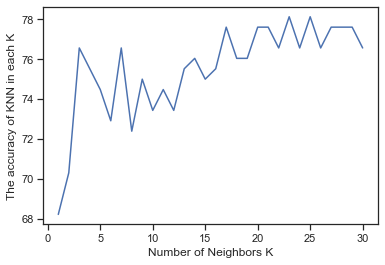

In [0]:
#Train 576 0-575, Test 192 576-767
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:].values
X_test = dataset.iloc[end:,:].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values
print("Menghitung akurasi KNN dengan neighbor dari 1 sampai 30, untuk menentukan akurasi yang paling tinggi.\n")
test_neighbors = list(range(1,31))
test_scores = list(range(1,31))
for x in range(len(test_neighbors)):
    predictions = k_nearest_neighbors(X_train, X_test, test_neighbors[x])
    score = accuracy_score(y_test, predictions)
    test_scores[x] = score
    print("Neighbors -", x+1," Akurasi: ",test_scores[x])
pyt.plot(test_neighbors, test_scores)
pyt.xlabel("Number of Neighbors K")
pyt.ylabel("The accuracy of KNN in each K")
pyt.show()

# Klasifikasi KNN dengan SKLearn

Neighbors - 1  Akurasi:  68.22916666666666
Neighbors - 2  Akurasi:  70.3125
Neighbors - 3  Akurasi:  76.5625
Neighbors - 4  Akurasi:  75.52083333333334
Neighbors - 5  Akurasi:  74.47916666666666
Neighbors - 6  Akurasi:  72.91666666666666
Neighbors - 7  Akurasi:  76.5625
Neighbors - 8  Akurasi:  72.39583333333334
Neighbors - 9  Akurasi:  75.0
Neighbors - 10  Akurasi:  73.4375
Neighbors - 11  Akurasi:  74.47916666666666
Neighbors - 12  Akurasi:  73.4375
Neighbors - 13  Akurasi:  75.52083333333334
Neighbors - 14  Akurasi:  76.04166666666666
Neighbors - 15  Akurasi:  75.0
Neighbors - 16  Akurasi:  75.52083333333334
Neighbors - 17  Akurasi:  77.60416666666666
Neighbors - 18  Akurasi:  76.04166666666666
Neighbors - 19  Akurasi:  76.04166666666666
Neighbors - 20  Akurasi:  77.60416666666666
Neighbors - 21  Akurasi:  77.60416666666666
Neighbors - 22  Akurasi:  76.5625
Neighbors - 23  Akurasi:  78.125
Neighbors - 24  Akurasi:  76.5625
Neighbors - 25  Akurasi:  78.125
Neighbors - 26  Akurasi:  7

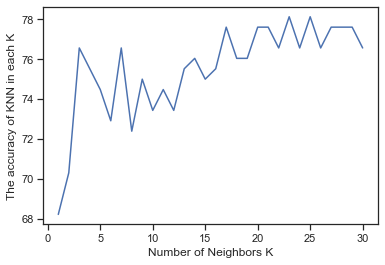

In [0]:
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:8].values
X_test = dataset.iloc[end:,:8].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values

from sklearn.neighbors import KNeighborsClassifier

test_neighbors1 = list(range(1,31))
test_scores1 = list(range(1,31))
for x in range(len(test_neighbors1)):
    classifier = KNeighborsClassifier(n_neighbors = x+1, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    test_scores1[x] = classifier.score(X_test,y_test) * 100
    print("Neighbors -", x+1," Akurasi: ",test_scores1[x])
pyt.plot(test_neighbors1,test_scores1)
pyt.xlabel("Number of Neighbors K")
pyt.ylabel("The accuracy of KNN in each K")
pyt.show()

Dari sini bisa dilihat akurasi paling tinggi saat K = 23 yaitu 78.125

In [0]:
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:].values
X_test = dataset.iloc[end:,:].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values
awal = time.time()
predictions = k_nearest_neighbors(X_train, X_test, 23)
score = accuracy_score(y_test, predictions)
print("Neighbors -", 23,score)
print("Presisi : ",presisi(y_test,predictions))
print("Recall  : ",recall(y_test,predictions),"\n")
akhir = time.time()
print("Total Waktu Proses ", akhir- awal, " Detik." )

Neighbors - 23 78.125
Presisi :  [0.7816901408450704, 0.78]
Recall  :  [0.9098360655737705, 0.5571428571428572] 

Total Waktu Proses  1.3849153518676758  Detik.


# Melakukan Normalisasi data Min Max dan mean untuk meningkatkan akurasi dan presisi

In [0]:
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset.iloc[0,0:8])):
        value_min = min(dataset.iloc[:,i])
        value_max = max(dataset.iloc[:,i])
        minmax.append([value_min, value_max])
    return minmax

# Normalisasi data menjadi 0-1
def normalize_dataset(dataset, minmax):
    for i in range(len(dataset.iloc[0,0:8])):
        for j in range(len(dataset.iloc[:,1])):
            dataset.iloc[j,i] = (dataset.iloc[j,i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    
# Menandakan angka 0 dengan NaN
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
dataset[cols] = dataset[cols].replace(0, numpy.NaN)

# Mengisi NaN dengan rata-rata
dataset.fillna(dataset.mean(), inplace=True)

# Menormalisasi data
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:].values
X_train1 = dataset.iloc[0:end,:-1].values
y_train = dataset.iloc[0:end,-1:].values
X_test = dataset.iloc[end:,:-1].values
y_test = dataset.iloc[end:,-1:].values



C:\Users\Alfarrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alfarrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


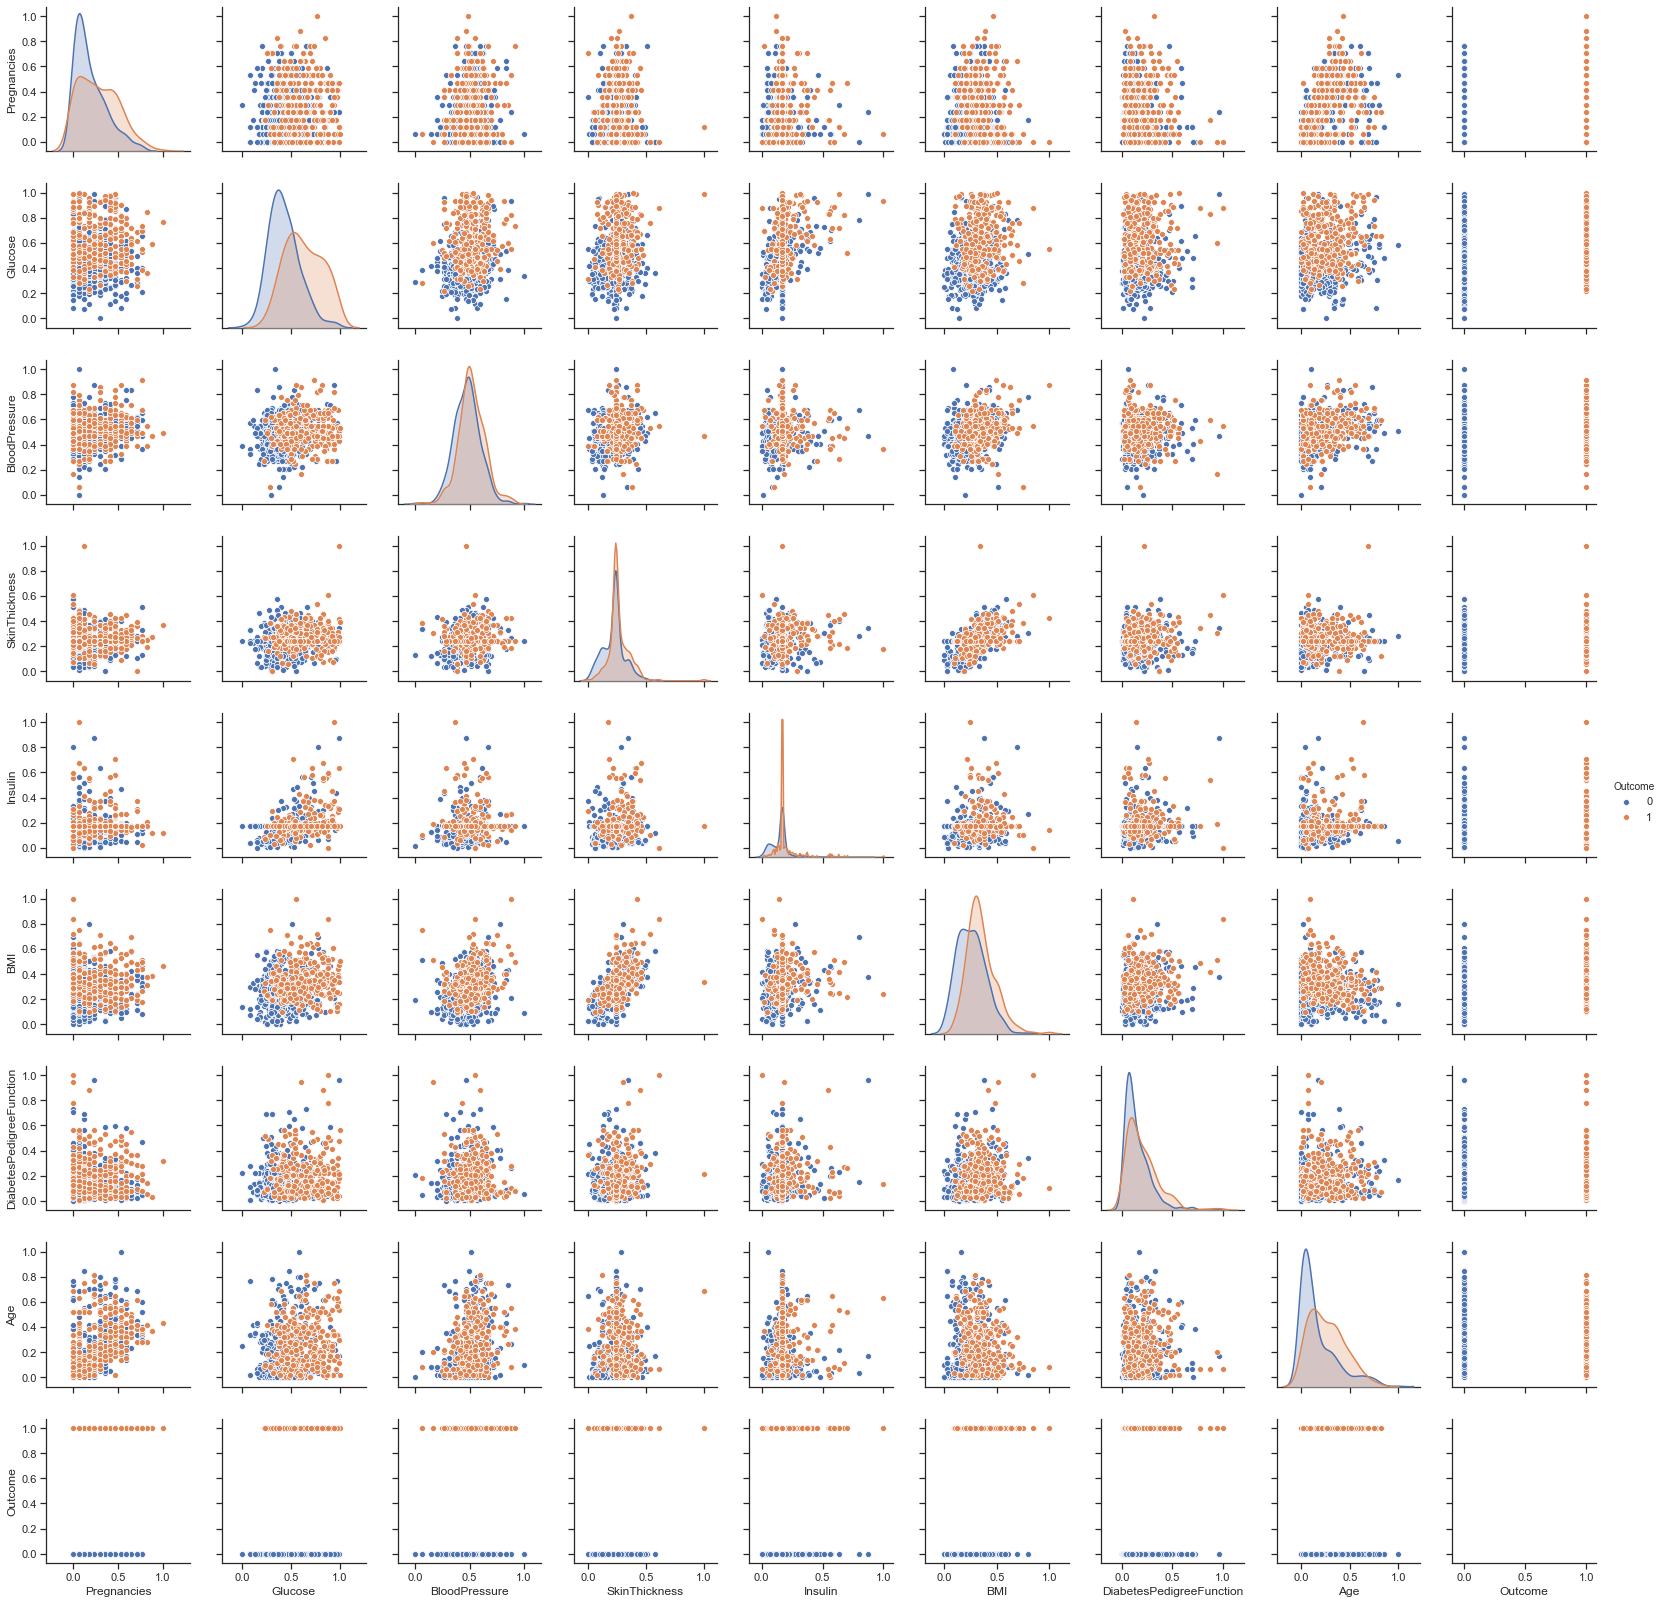

In [0]:
s.set(style="ticks")

s.pairplot(dataset, hue="Outcome")

# Klasifikasi Dengan Naive Bayes Setelah Normalisasi Data

In [0]:
print("======= Klasifikasi dengan Naive Bayes setelah normalisasi data =======");
awal = time.time()
y_pred = naive_bayes(X_train, X_test)
print("Tingkat Akurasi : ", akurasi(y_test,y_pred))
print("presisi : ",presisi(y_test,y_pred))
print("recall  : ",recall(y_test,y_pred),"\n")
print("Hasil Prediksi : ")
print(y_pred, "\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(pd.DataFrame(list(zip(y_test,y_pred)), columns=["Actual","Prediction"]))
akhir = time.time()  
print("Total Waktu Proses ", akhir- awal, " Detik." )

print("\n\n\n======= Klasifikasi dengan Naive Bayes menggunakan sklearn setelah normalisasi data =======");
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train1, y_train)
print("hasil klasifikasi naive bayes: "+str(classifier.score(X_test,y_test)))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

======= Klasifikasi dengan Naive Bayes setelah normalisasi data =======
Tingkat Akurasi :  77.08333333333334
presisi :  [0.8046875, 0.703125]
recall  :  [0.8442622950819673, 0.6428571428571429] 

Hasil Prediksi : 
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 

C:\Users\Alfarrel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Dengan Melakukan Normalisasi data maka akurasi naik yang semula -+ 76% menjadi -+ 77% dengan presisi dan recall yang lebih baik dapat dilihat pada hasil yang ditunjukkan.

# Klasifikasi Dengan KNN Setelah Normalisasi Data

Neighbors - 1  Akurasi:  70.3125
Neighbors - 2  Akurasi:  68.22916666666666
Neighbors - 3  Akurasi:  73.4375
Neighbors - 4  Akurasi:  76.04166666666666
Neighbors - 5  Akurasi:  77.08333333333334
Neighbors - 6  Akurasi:  76.04166666666666
Neighbors - 7  Akurasi:  77.08333333333334
Neighbors - 8  Akurasi:  77.08333333333334
Neighbors - 9  Akurasi:  79.6875
Neighbors - 10  Akurasi:  80.20833333333334
Neighbors - 11  Akurasi:  79.6875
Neighbors - 12  Akurasi:  78.64583333333334
Neighbors - 13  Akurasi:  79.16666666666666
Neighbors - 14  Akurasi:  78.64583333333334
Neighbors - 15  Akurasi:  80.72916666666666
Neighbors - 16  Akurasi:  79.16666666666666
Neighbors - 17  Akurasi:  81.77083333333334
Neighbors - 18  Akurasi:  80.72916666666666
Neighbors - 19  Akurasi:  81.25
Neighbors - 20  Akurasi:  78.64583333333334
Neighbors - 21  Akurasi:  81.77083333333334
Neighbors - 22  Akurasi:  81.77083333333334
Neighbors - 23  Akurasi:  82.8125
Neighbors - 24  Akurasi:  81.77083333333334
Neighbors - 25 

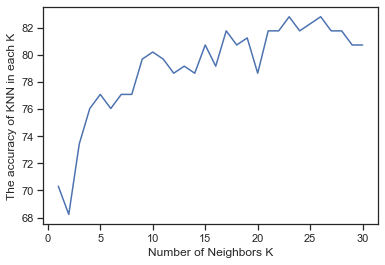

In [0]:
#Train 576 0-575, Test 192 576-767
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:].values
X_test = dataset.iloc[end:,:].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values

test_neighbors = list(range(1,31))
test_scores = list(range(1,31))
for x in range(len(test_neighbors)):
    predictions = k_nearest_neighbors(X_train, X_test, test_neighbors[x])
    score = accuracy_score(y_test, predictions)
    test_scores[x] = score
    print("Neighbors -", x+1," Akurasi: ",test_scores[x])

print("\nPerhitungan KNN dengan SKLearn\n")

end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:8].values
X_test = dataset.iloc[end:,:8].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values
    
from sklearn.neighbors import KNeighborsClassifier
test_neighbors1 = list(range(1,31))
test_scores1 = list(range(1,31))
for x in range(len(test_neighbors1)):
    classifier = KNeighborsClassifier(n_neighbors = x+1, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    test_scores1[x] = classifier.score(X_test,y_test)
    print("Neighbors -", x+1," Akurasi: ",test_scores1[x])

pyt.plot(test_neighbors, test_scores)
pyt.xlabel("Number of Neighbors K")
pyt.ylabel("The accuracy of KNN in each K")
pyt.show()

Dari sini bisa dilihat akurasi paling tinggi tetap K = 23 yaitu 82.8125

In [0]:
end = int(len(dataset.iloc[:,0].values) / 4 * 3)
X_train = dataset.iloc[0:end,:].values
X_test = dataset.iloc[end:,:].values
y_train = dataset.iloc[0:end,8].values
y_test = dataset.iloc[end:,8].values
awal = time.time()
predictions = k_nearest_neighbors(X_train, X_test, 23)
score = accuracy_score(y_test, predictions)
print("Neighbors -", 23,score)
print("Presisi : ",presisi(y_test,predictions))
print("Recall  : ",recall(y_test,predictions),"\n")
akhir = time.time()
print("Total Waktu Proses ", akhir- awal, " Detik." )

Neighbors - 23 82.8125
Presisi :  [0.8449612403100775, 0.7936507936507936]
Recall  :  [0.8934426229508197, 0.7142857142857143] 

Total Waktu Proses  1.4739716053009033  Detik.


### =========================================================================================

## Melakukan optimasi dengan Z-Score, menghilangkan noise pada dataset.

In [0]:
import numpy as np
def HasilZscore(dataset):
    z = np.abs(stats.zscore(dataset.iloc[:,:-1]))
    data = dataset.iloc[:,:-1]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = dataset
    data_df_o = data[(z < 2).all(axis=1)]
    data_df = data_df_o[~((data_df_o < (Q1 - 1.5 * IQR)) |(data_df_o > (Q3 + 1.5 * IQR))).all(axis=1)]
    return data_df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 542 non-null float64
Glucose                     542 non-null float64
BloodPressure               542 non-null float64
SkinThickness               542 non-null float64
Insulin                     542 non-null float64
BMI                         542 non-null float64
DiabetesPedigreeFunction    542 non-null float64
Age                         542 non-null float64
Outcome                     542 non-null int64
dtypes: float64(8), int64(1)
memory usage: 42.3 KB
None 

Counter({0: 382, 1: 160}) 

Data berkurang sebanyak 226. 
 118 dengan outcome 0 dan 108 dengan outcome 1


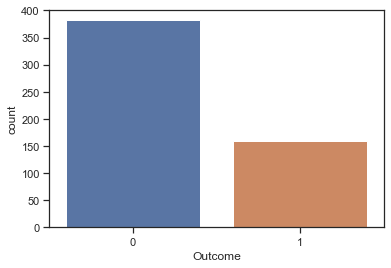

In [0]:
data_df_out = HasilZscore(dataset)
print(data_df_out.info(),"\n")
print(Counter(data_df_out.Outcome),"\n")
s.countplot(x='Outcome',data=data_df_out)
print("Data berkurang sebanyak 226. \n 118 dengan outcome 0 dan 108 dengan outcome 1")

## Visualisasi dataset setelah dihilangkan noisenya

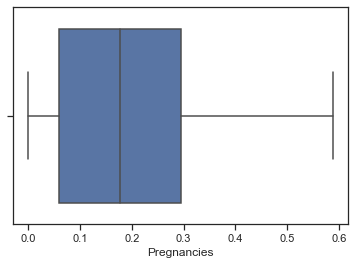

In [0]:
s.boxplot(x=data_df_out['Pregnancies'])

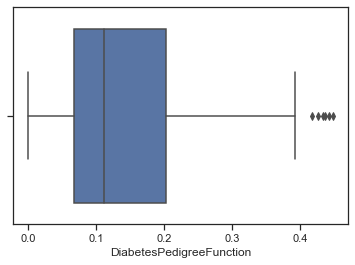

In [0]:
s.boxplot(x=data_df_out['DiabetesPedigreeFunction'])

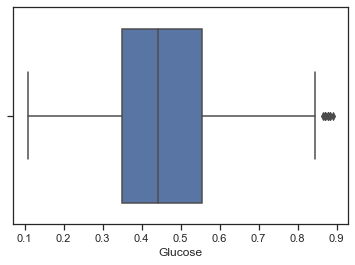

In [0]:
s.boxplot(x=data_df_out['Glucose'])

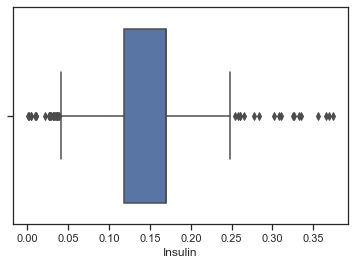

In [0]:
s.boxplot(x=data_df_out['Insulin'])

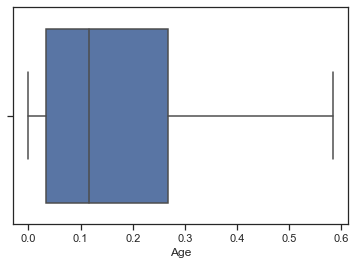

In [0]:
s.boxplot(x=data_df_out['Age'])

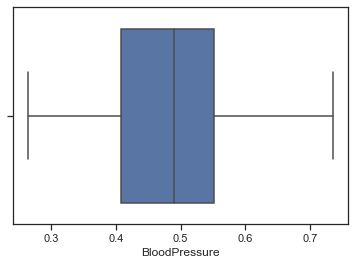

In [0]:
s.boxplot(x=data_df_out['BloodPressure'])

C:\Users\Alfarrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alfarrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


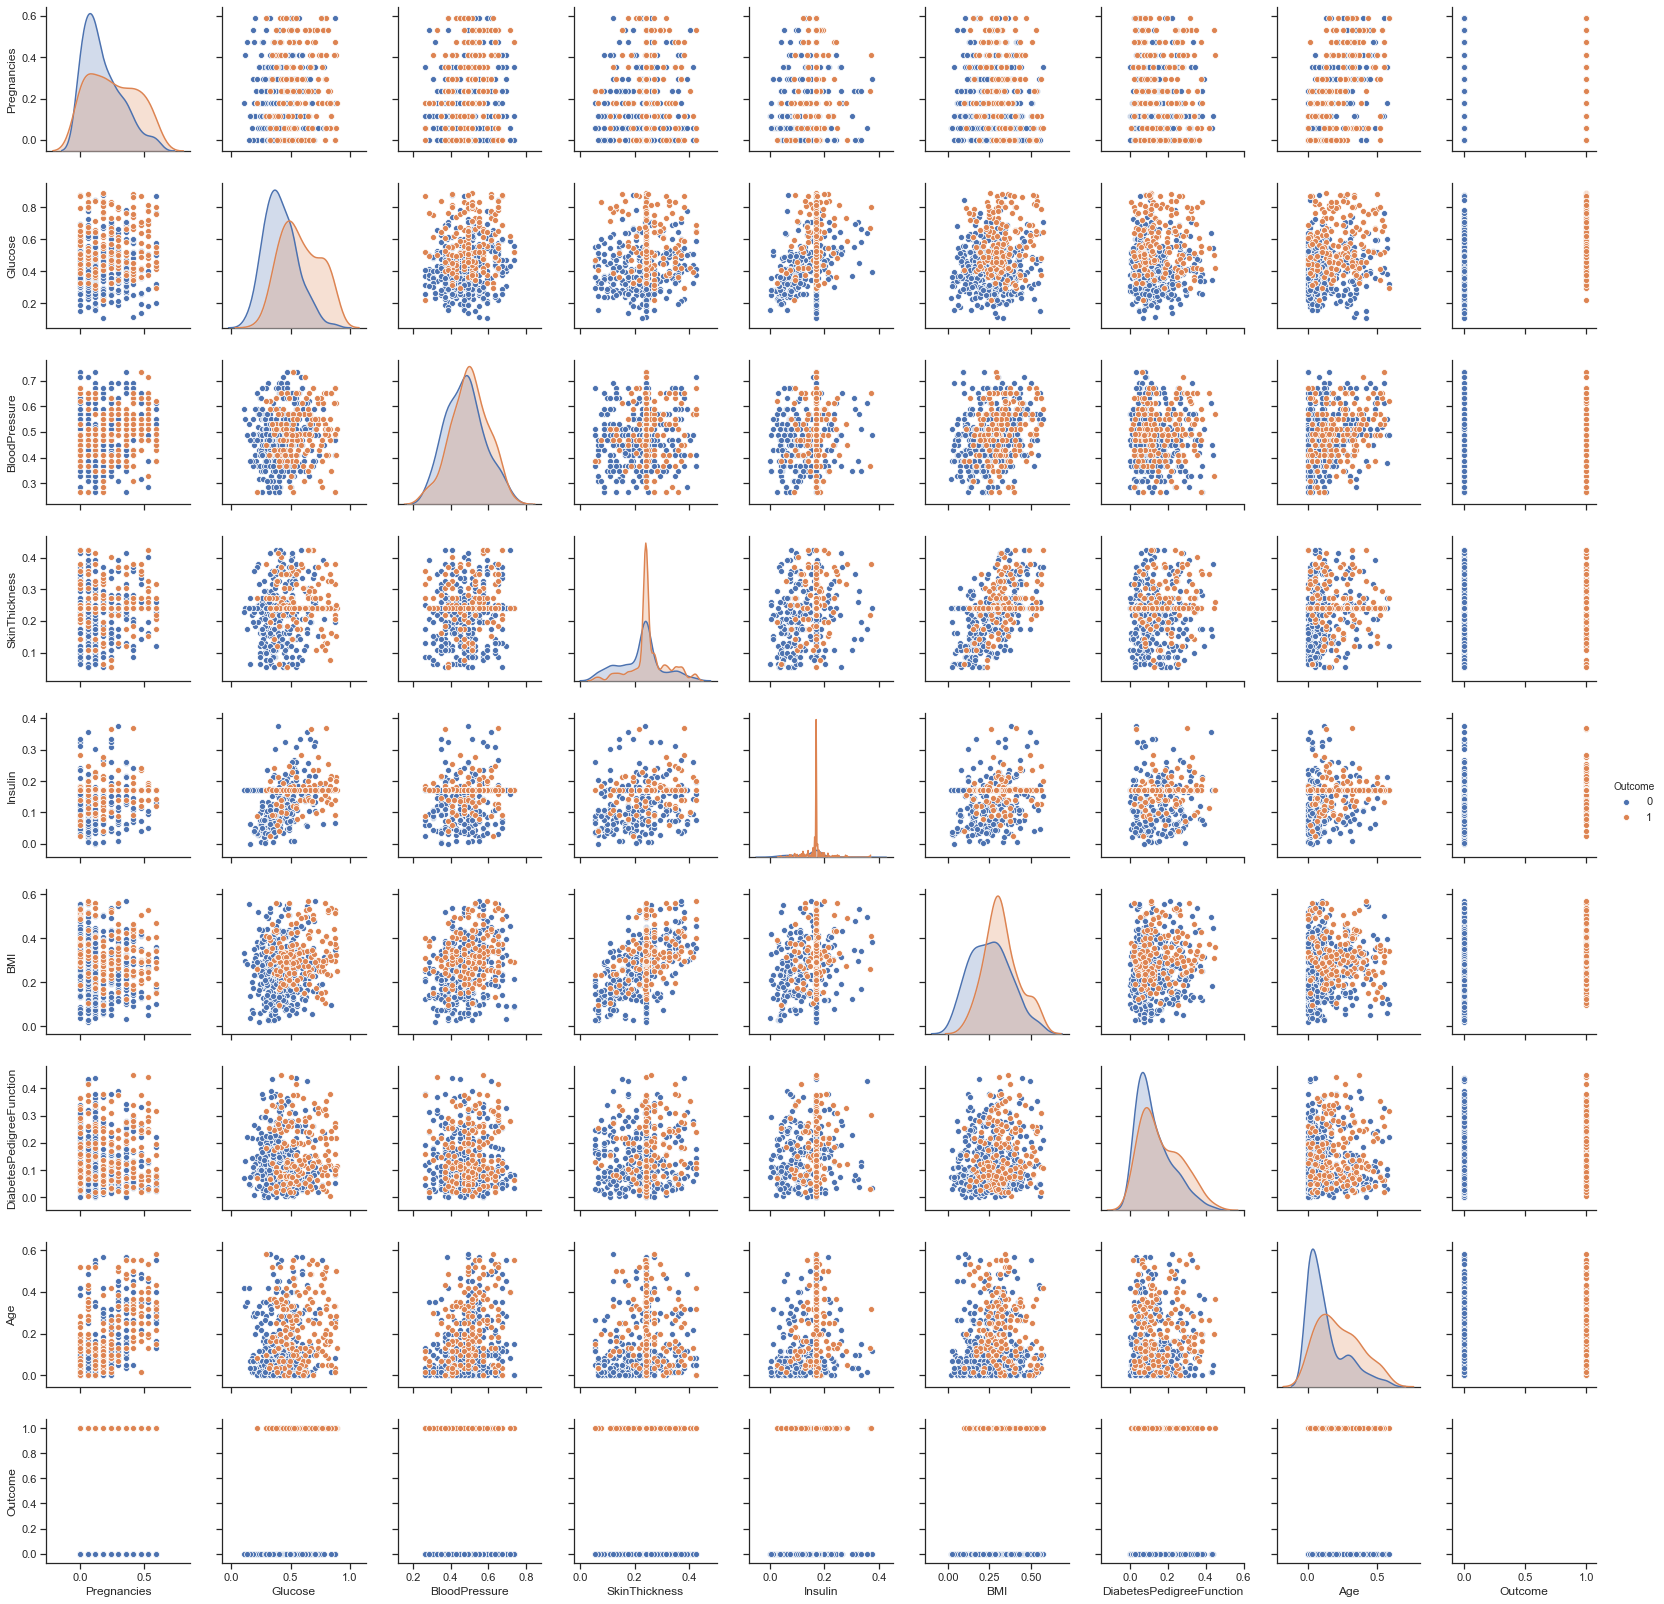

In [0]:
s.set(style="ticks")

s.pairplot(data_df_out, hue="Outcome")

# Naive Bayes

In [0]:
import numpy as np

end = int(len(data_df_out.iloc[:,0].values) / 4 * 3)
X_train = data_df_out.iloc[0:end,:].values
X_train1 = data_df_out.iloc[0:end,:-1].values
y_train = data_df_out.iloc[0:end,-1:].values
X_test = data_df_out.iloc[end:,:-1].values
y_test = data_df_out.iloc[end:,-1:].values

print("======= Klasifikasi dengan Naive Bayes menghilangkan outlier =======");
awal = time.time()
y_pred = naive_bayes(X_train, X_test)
print("Tingkat Akurasi : ", akurasi(y_test,y_pred))
print("Presisi : ",presisi(y_test,y_pred))
print("Recall  : ",recall(y_test,y_pred),"\n")
print("Hasil Prediksi : ")
print(y_pred, "\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(pd.DataFrame(list(zip(y_test,y_pred)), columns=["Actual","Prediction"]))
akhir = time.time()  
print("Total Waktu Proses ", akhir- awal, " Detik." )

print("\n\n\n======= Klasifikasi dengan Naive Bayes dari sklearn menghilangkan outlier=======");
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train1, y_train)
print("Hasil klasifikasi naive bayes: "+str(classifier.score(X_test,y_test)))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

======= Klasifikasi dengan Naive Bayes menghilangkan outlier =======
Tingkat Akurasi :  81.61764705882352
Presisi :  [0.9069767441860465, 0.66]
Recall  :  [0.8210526315789474, 0.8048780487804879] 

Hasil Prediksi : 
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0] 

              precision    recall  f1-score   support

           0       0.91      0.82      0.86   

C:\Users\Alfarrel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN

Neighbors - 1  Akurasi:  71.32352941176471
Neighbors - 2  Akurasi:  71.32352941176471
Neighbors - 3  Akurasi:  75.0
Neighbors - 4  Akurasi:  78.67647058823529
Neighbors - 5  Akurasi:  78.67647058823529
Neighbors - 6  Akurasi:  79.41176470588235
Neighbors - 7  Akurasi:  82.35294117647058
Neighbors - 8  Akurasi:  82.35294117647058
Neighbors - 9  Akurasi:  80.14705882352942
Neighbors - 10  Akurasi:  80.88235294117648
Neighbors - 11  Akurasi:  79.41176470588235
Neighbors - 12  Akurasi:  78.67647058823529
Neighbors - 13  Akurasi:  80.88235294117648
Neighbors - 14  Akurasi:  78.67647058823529
Neighbors - 15  Akurasi:  80.14705882352942
Neighbors - 16  Akurasi:  81.61764705882352
Neighbors - 17  Akurasi:  80.88235294117648
Neighbors - 18  Akurasi:  81.61764705882352
Neighbors - 19  Akurasi:  81.61764705882352
Neighbors - 20  Akurasi:  82.35294117647058
Neighbors - 21  Akurasi:  84.55882352941177
Neighbors - 22  Akurasi:  83.08823529411765
Neighbors - 23  Akurasi:  83.08823529411765
Neighbors 

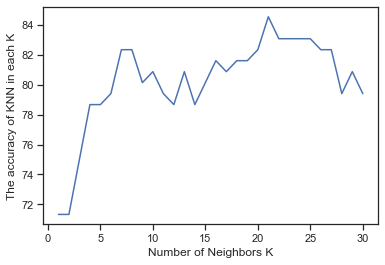

In [0]:
end = int(len(data_df_out.iloc[:,0].values) / 4 * 3)
X_train = data_df_out.iloc[0:end,:].values
X_test = data_df_out.iloc[end:,:].values
y_train = data_df_out.iloc[0:end,8].values
y_test = data_df_out.iloc[end:,8].values

test_neighbors = list(range(1,31))
test_scores = list(range(1,31))
for x in range(len(test_neighbors)):
    predictions = k_nearest_neighbors(X_train, X_test, test_neighbors[x])
    score = accuracy_score(y_test, predictions)
    test_scores[x] = score
    print("Neighbors -", x+1," Akurasi: ",test_scores[x])


pyt.plot(test_neighbors,test_scores)
pyt.xlabel("Number of Neighbors K")
pyt.ylabel("The accuracy of KNN in each K")
pyt.show()

Dari sini bisa dilihat akurasi paling tinggi berubah menjadi K = 21 yaitu 84.55

In [0]:
end = int(len(data_df_out.iloc[:,0].values) / 4 * 3)
X_train = data_df_out.iloc[0:end,:].values
X_test = data_df_out.iloc[end:,:].values
y_train = data_df_out.iloc[0:end,8].values
y_test = data_df_out.iloc[end:,8].values
awal = time.time()
predictions = k_nearest_neighbors(X_train, _X_test, 21)
score = accuracy_score(y_test, predictions)
print("Neighbors -", 21," Akurasi: ",score)
print("Presisi : ",presisi(y_test,predictions))
print("Recall  : ",recall(y_test,predictions),"\n")
akhir = time.time()
print("Total Waktu Proses ", akhir- awal, " Detik." )

Neighbors - 21  Akurasi:  84.55882352941177
Presisi :  [0.8557692307692307, 0.8125]
Recall  :  [0.9368421052631579, 0.6341463414634146] 

Total Waktu Proses  0.7174744606018066  Detik.


## Kesimpulan

- Dengan metode Naive Bayes akurasinya 81.6, presisi sekitar 75, dan recall sekitar 81.
- Dengan metode KNN akurasinya 84.5, presisi sekitar 83, dan recall sekitar 78.

### Referensi:

1. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. https://matplotlib.org/tutorials/introductory/pyplot.html
4. https://seaborn.pydata.org/generated/seaborn.pairplot.html
5. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/